In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('../Data/Train/train.csv')
train.head()

id  bone_length  rotting_flesh  hair_length  has_soul  color    type
0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin
2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost

In [14]:
train.shape

(371, 7)

In [7]:
train.describe(include='all')

bone_length  rotting_flesh  hair_length    has_soul  color   type
count    371.000000     371.000000   371.000000  371.000000    371    371
unique          NaN            NaN          NaN         NaN      6      3
top             NaN            NaN          NaN         NaN  white  Ghoul
freq            NaN            NaN          NaN         NaN    137    129
mean       0.434160       0.506848     0.529114    0.471392    NaN    NaN
std        0.132833       0.146358     0.169902    0.176129    NaN    NaN
min        0.061032       0.095687     0.134600    0.009402    NaN    NaN
25%        0.340006       0.414812     0.407428    0.348002    NaN    NaN
50%        0.434891       0.501552     0.538642    0.466372    NaN    NaN
75%        0.517223       0.603977     0.647244    0.600610    NaN    NaN
max        0.817001       0.932466     1.000000    0.935721    NaN    NaN

In [19]:
train.isna().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 17.5+ KB


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train.drop(columns='id', inplace=True)

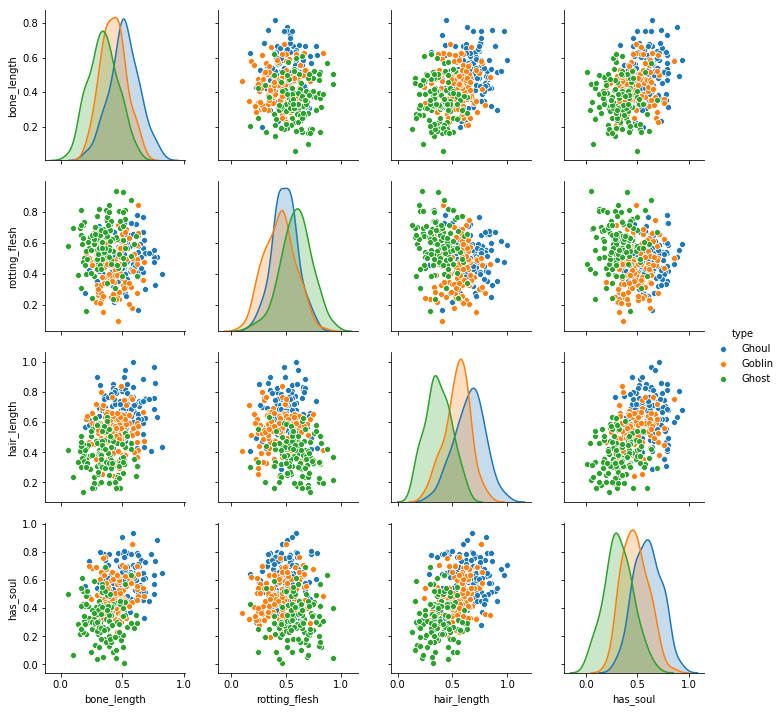

In [43]:
sns.pairplot(train, hue='type', diag_kind='kde')

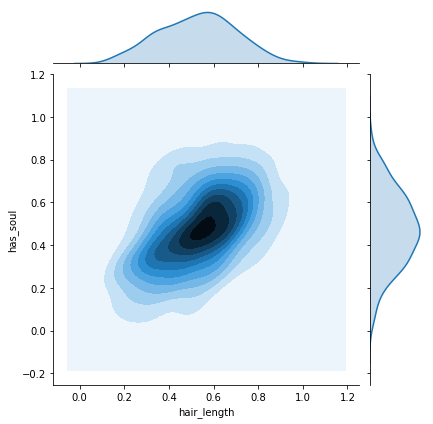

In [13]:
sns.jointplot('hair_length', 'has_soul', data=train, kind='kde')

In [19]:
list(train.columns)

['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color', 'type']

['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']


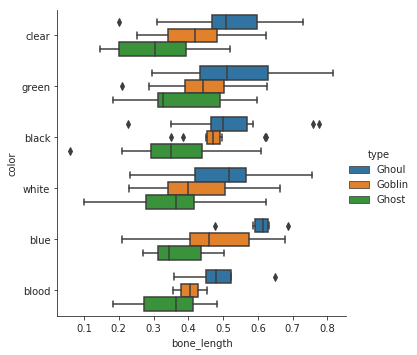

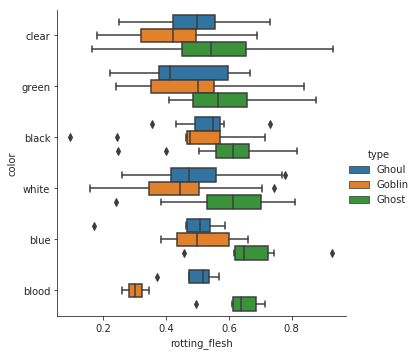

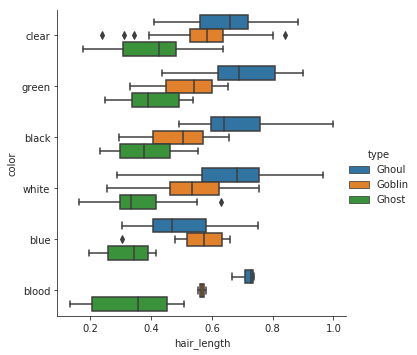

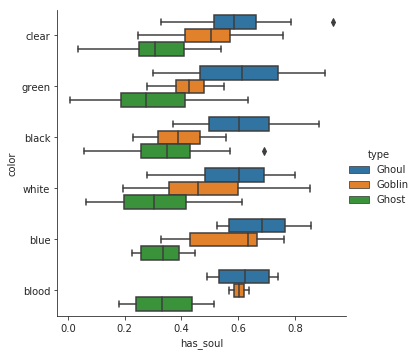

In [26]:
col = list(train.columns)[:-2]
print(col)

for c in col:
    with sns.axes_style(style='ticks'):
        g = sns.factorplot(c, "color", "type", data=train, kind="box")
        g.set_axis_labels(c, "color")

bone_length


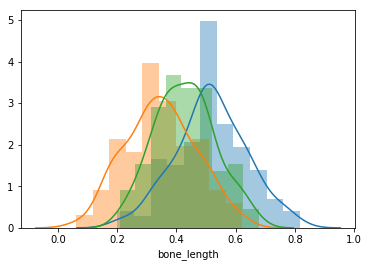

rotting_flesh


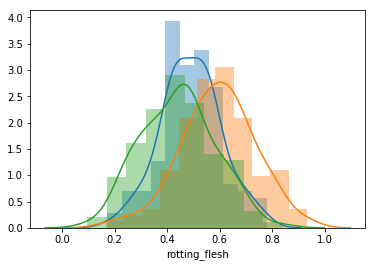

hair_length


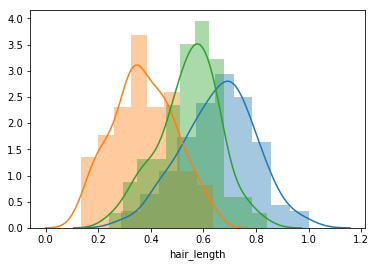

has_soul


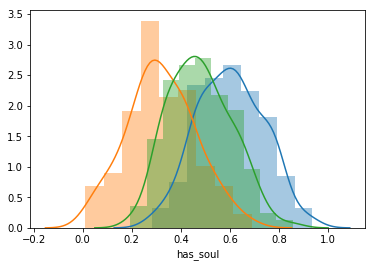

In [46]:
for c in col:
    print(c)
    sns.distplot(train.loc[train['type'] == 'Ghoul', c])
    sns.distplot(train.loc[train['type'] == 'Ghost', c])
    sns.distplot(train.loc[train['type'] == 'Goblin', c])
    plt.show()

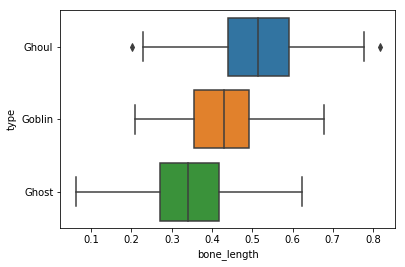

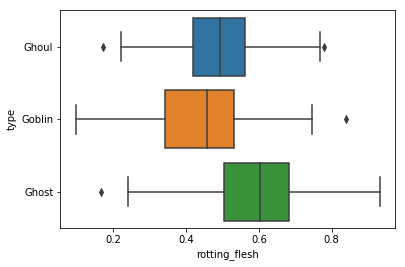

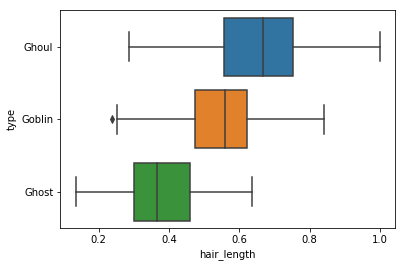

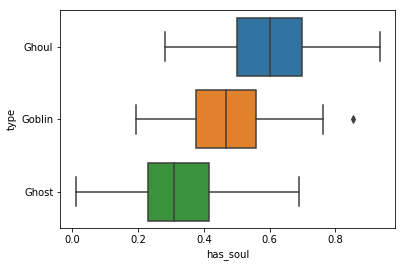

In [47]:
for c in col:
    sns.boxplot(c, 'type', data=train)
    plt.show()

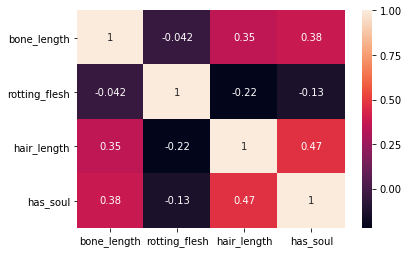

In [50]:
corr = train.corr()

sns.heatmap(corr, annot=True)

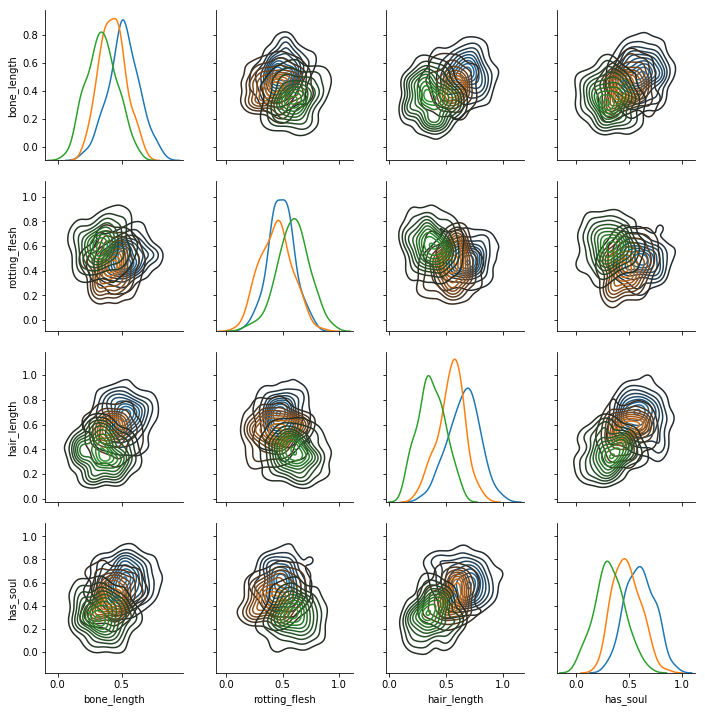

In [55]:
g = sns.PairGrid(train, hue='type')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

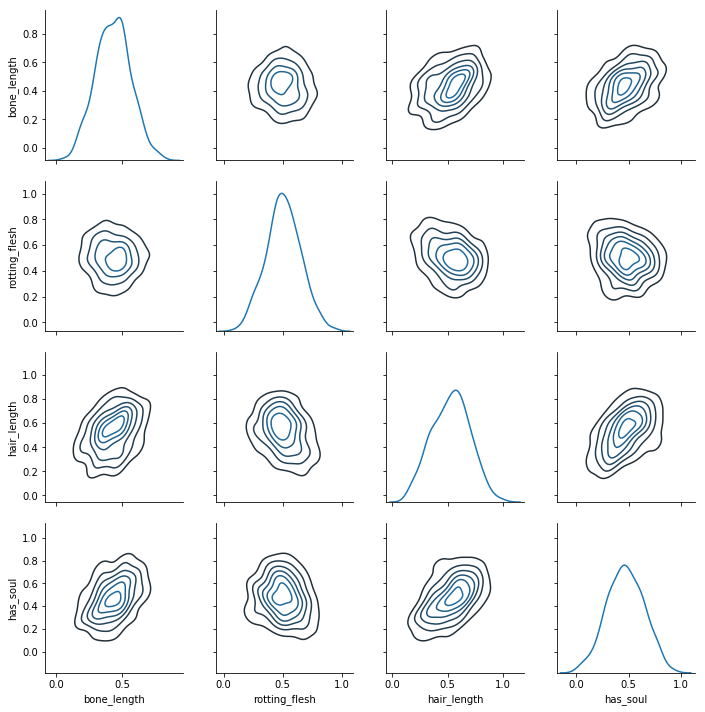

In [56]:
g = sns.PairGrid(train)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

Attempt with feature engineering

In [132]:
train_transformed = train.copy()

In [147]:
train_transformed['rotting_bone'] = train['rotting_flesh'] * train['bone_length']
train_transformed['rotting_hair'] = train['rotting_flesh'] * train['hair_length']
train_transformed['rotting_soul'] = train['rotting_flesh'] * train['has_soul']
train_transformed['bone_hair'] = train['bone_length'] * train['hair_length']
train_transformed['bone_soul'] = train['bone_length'] * train['has_soul']
train_transformed['soul_hair'] = train['has_soul'] * train['hair_length']
train_transformed.describe()

bone_length  rotting_flesh  hair_length    has_soul  rotting_bone  \
count   371.000000     371.000000   371.000000  371.000000    371.000000   
mean      0.434160       0.506848     0.529114    0.471392      0.219245   
std       0.132833       0.146358     0.169902    0.176129      0.092707   
min       0.061032       0.095687     0.134600    0.009402      0.033617   
25%       0.340006       0.414812     0.407428    0.348002      0.148753   
50%       0.434891       0.501552     0.538642    0.466372      0.209022   
75%       0.517223       0.603977     0.647244    0.600610      0.273899   
max       0.817001       0.932466     1.000000    0.935721      0.527259   

       rotting_hair  rotting_soul   bone_hair   bone_soul   soul_hair  
count    371.000000    371.000000  371.000000  371.000000  371.000000  
mean       0.262716      0.235530    0.237685    0.213565    0.263591  
std        0.103768      0.108434    0.121264    0.119618    0.147773  
min        0.038924      0.004360    0.023789    0.004859    0.003026  
25%        0.188052      0.158055    0.143756    0.117469    0.143652  
50%        0.253609      0.224976    0.226107    0.191900    0.244232  
75%        0.331280      0.303275    0.319040    0.282398    0.365027  
max        0.593954      0.617408    0.729292    0.686921    0.734639

In [134]:
train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
rotting_bone     371 non-null float64
rotting_hair     371 non-null float64
rotting_soul     371 non-null float64
bone_hair        371 non-null float64
bone_soul        371 non-null float64
soul_hair        371 non-null float64
dtypes: float64(10), object(2)
memory usage: 34.9+ KB


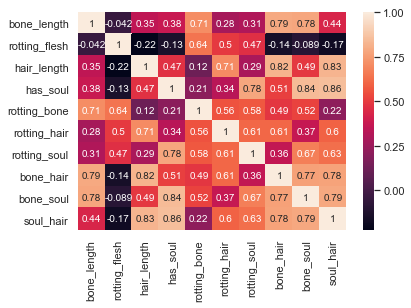

In [180]:
corr = train_transformed.corr()
%matplotlib inline
sns.heatmap(corr, annot=True)

<IPython.core.display.Javascript object>


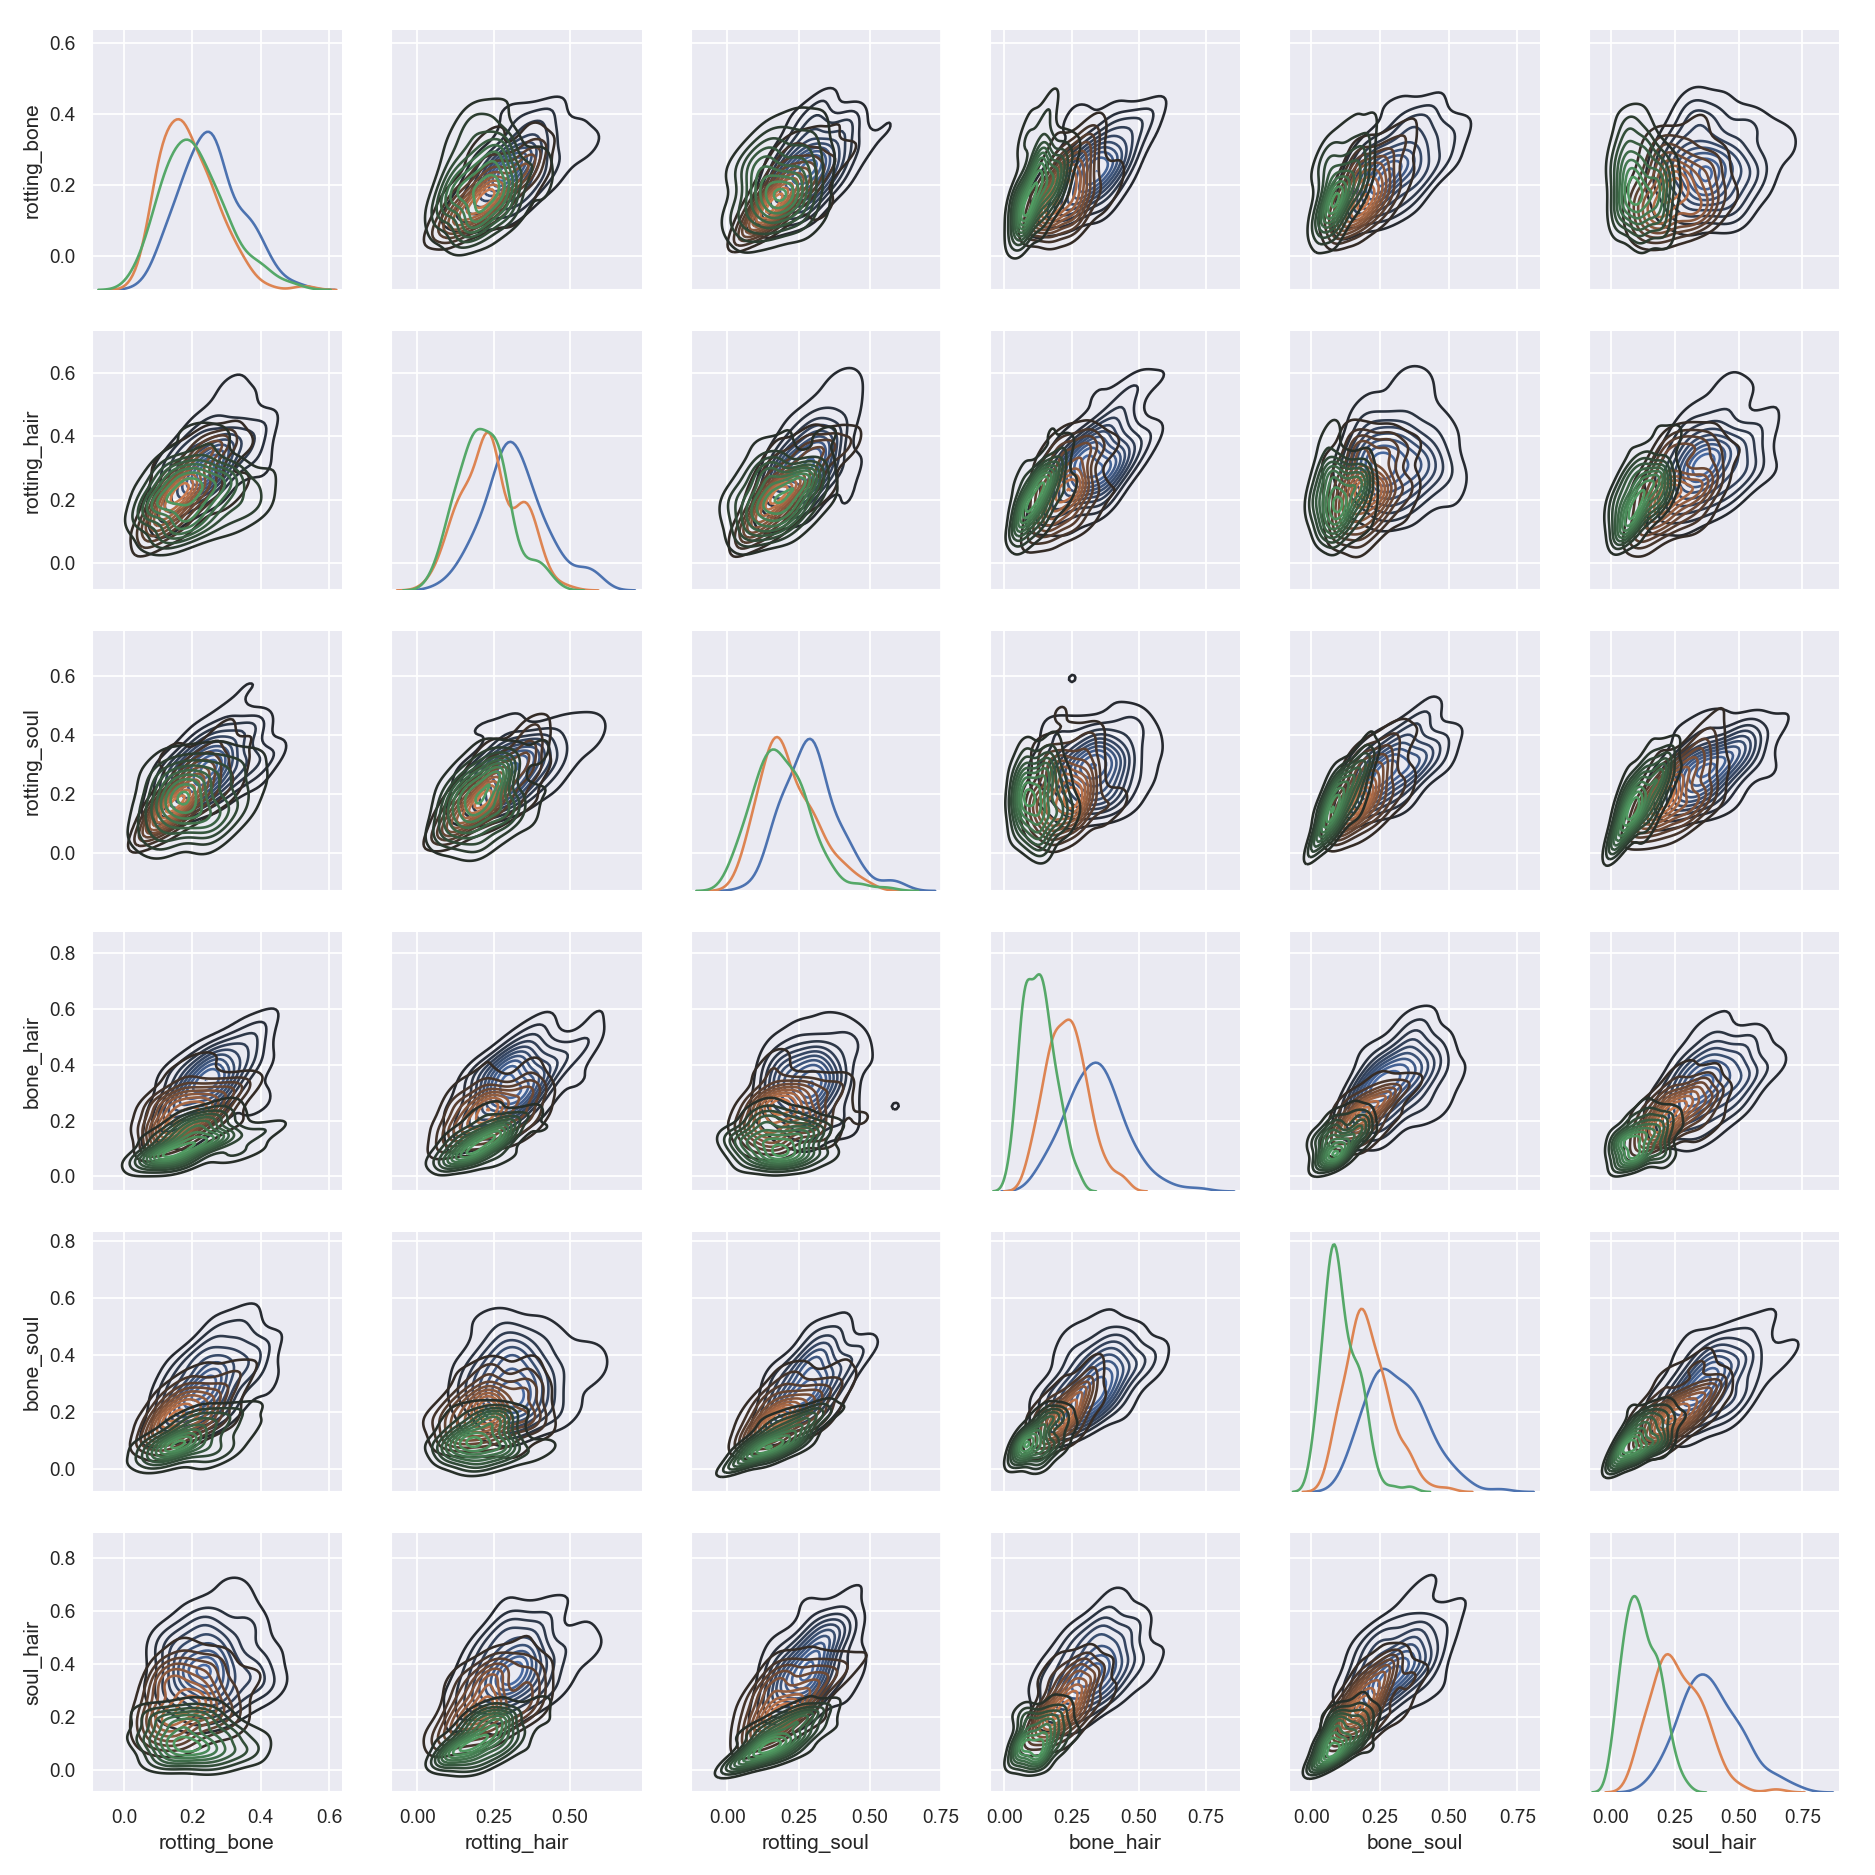

In [139]:
g = sns.PairGrid(train_transformed[train_transformed.columns[5:]], hue='type')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

<IPython.core.display.Javascript object>


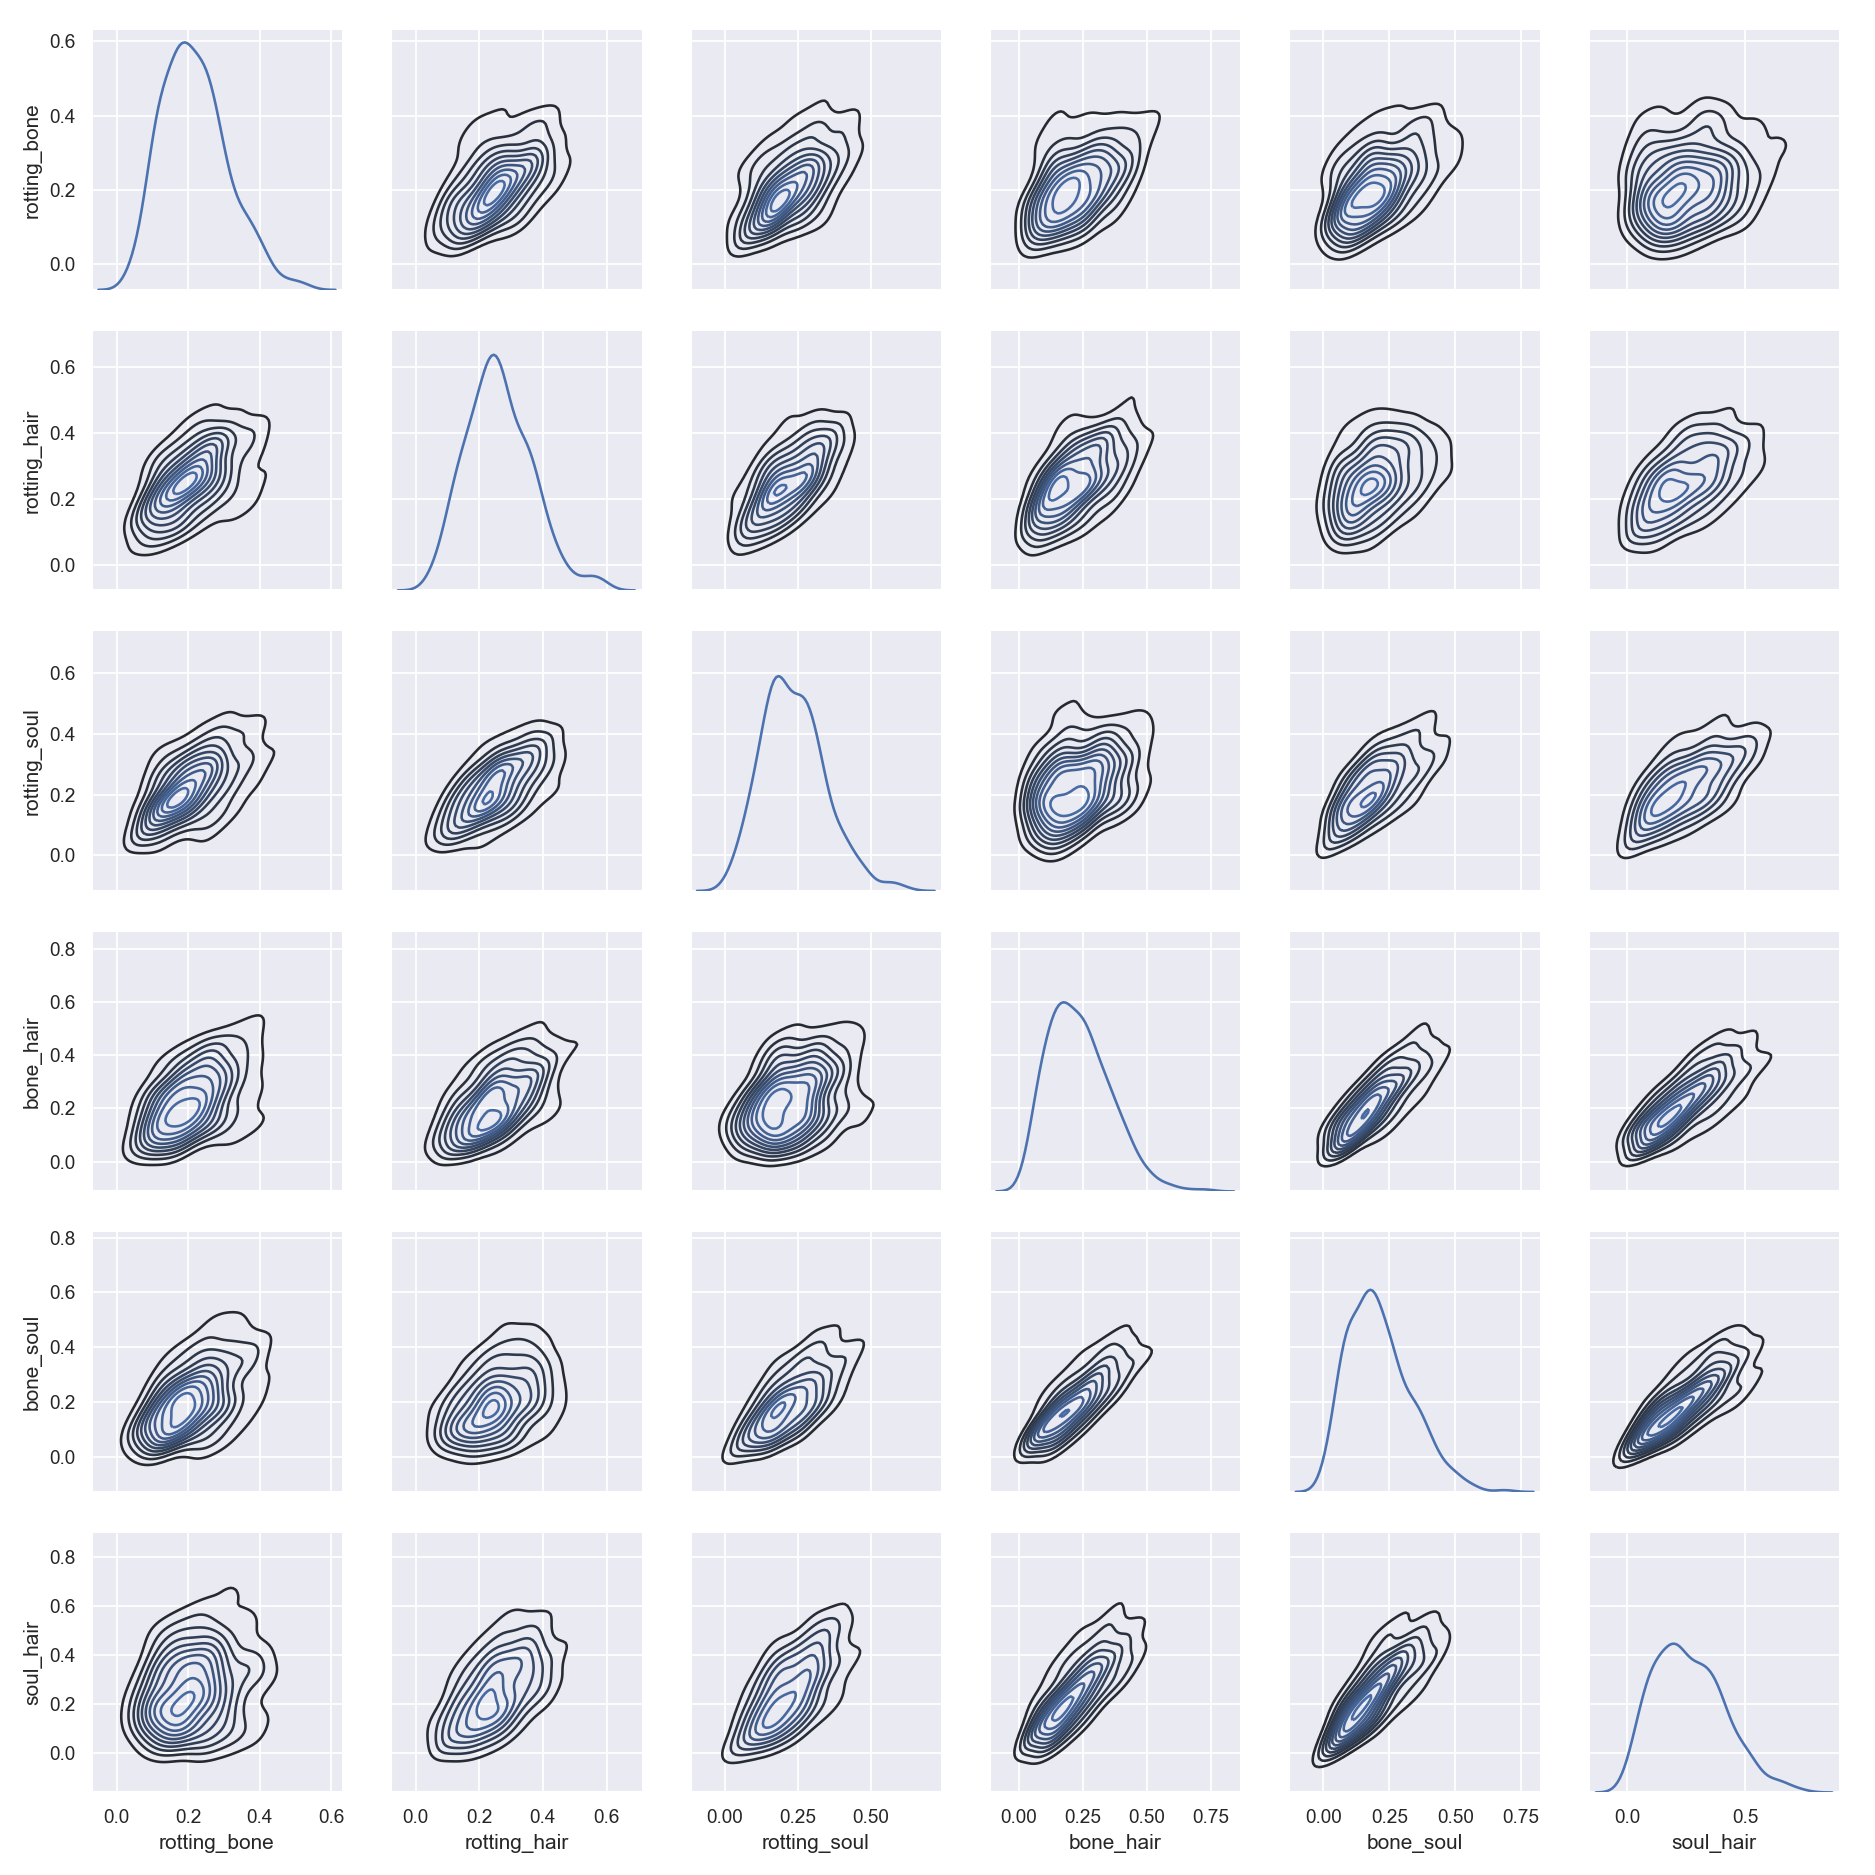

In [140]:
g = sns.PairGrid(train_transformed[train_transformed.columns[5:]])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

In [142]:
col = list(train_transformed[train_transformed.columns[6:]].columns)
# col = col[:4] + col[6:]
col

['rotting_bone',
 'rotting_hair',
 'rotting_soul',
 'bone_hair',
 'bone_soul',
 'soul_hair']

rotting_bone


c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


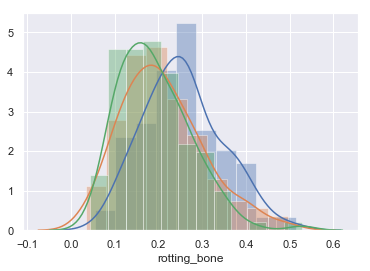

rotting_hair


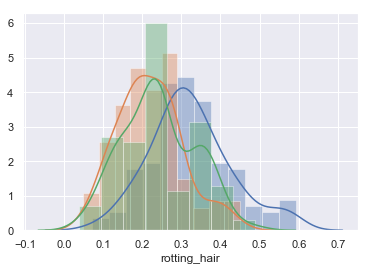

rotting_soul


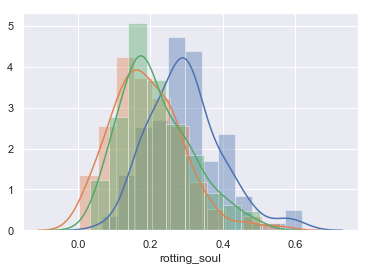

bone_hair


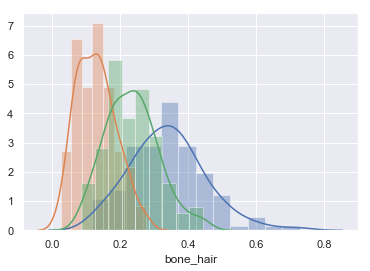

bone_soul


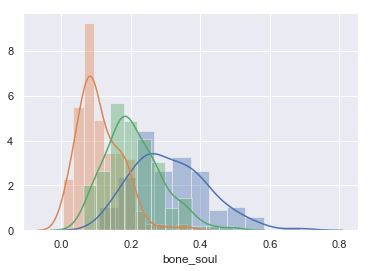

soul_hair


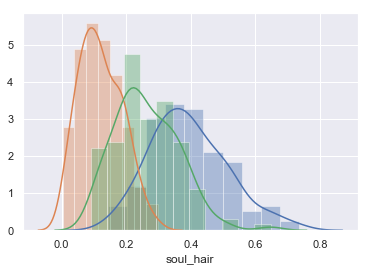

In [144]:
%matplotlib inline
for c in col:
    print(c)
    sns.distplot(train_transformed.loc[train_transformed['type'] == 'Ghoul', c])
    sns.distplot(train_transformed.loc[train_transformed['type'] == 'Ghost', c])
    sns.distplot(train_transformed.loc[train_transformed['type'] == 'Goblin', c])
    plt.show()

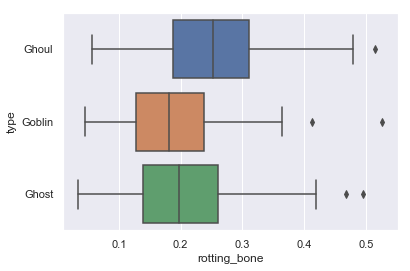

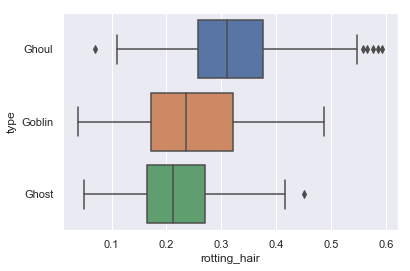

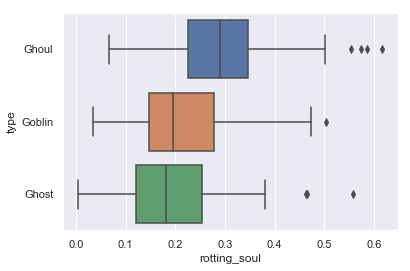

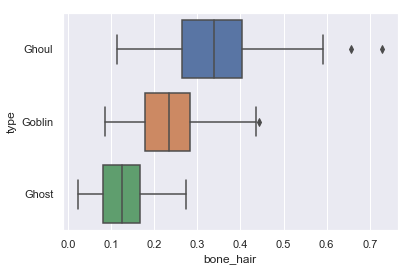

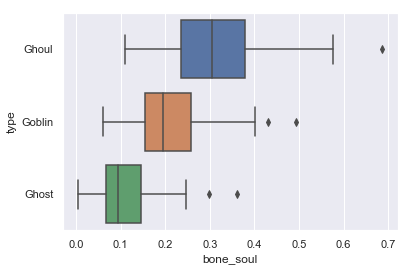

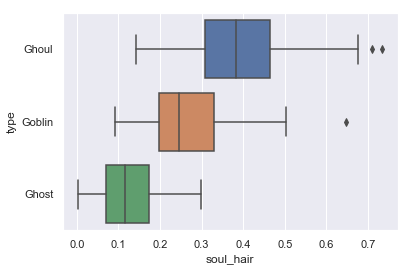

In [145]:
for c in col:
    sns.boxplot(c, 'type', data=train_transformed)
    plt.show()

In [91]:
x = np.asarray(train.iloc[:, :4])

In [93]:
from sklearn.manifold import TSNE

In [94]:
tsne = TSNE(n_components=3).fit_transform(x)

In [113]:
tsne_df = train[['type']]
tsne_df['tsne1'] = tsne[:,[0]]
tsne_df['tsne2'] = tsne[:,[1]]
tsne_df['tsne3'] = tsne[:,[2]]
# tsne_df['type'] = train['type']
tsne_df.shape

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

(371, 4)

In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tsne_df['label'] = le.fit_transform(tsne_df['type'])

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [118]:
tsne_df.head()

type       tsne1      tsne2      tsne3  label
0   Ghoul   63.111279   8.936906  63.282848      1
1  Goblin  125.504059 -16.579060 -38.638134      2
2   Ghoul   42.199333 -39.106266  92.570435      1
3   Ghoul  104.166801 -17.562836  62.040787      1
4   Ghost   77.743500 -41.275536 -95.167656      0

<IPython.core.display.Javascript object>


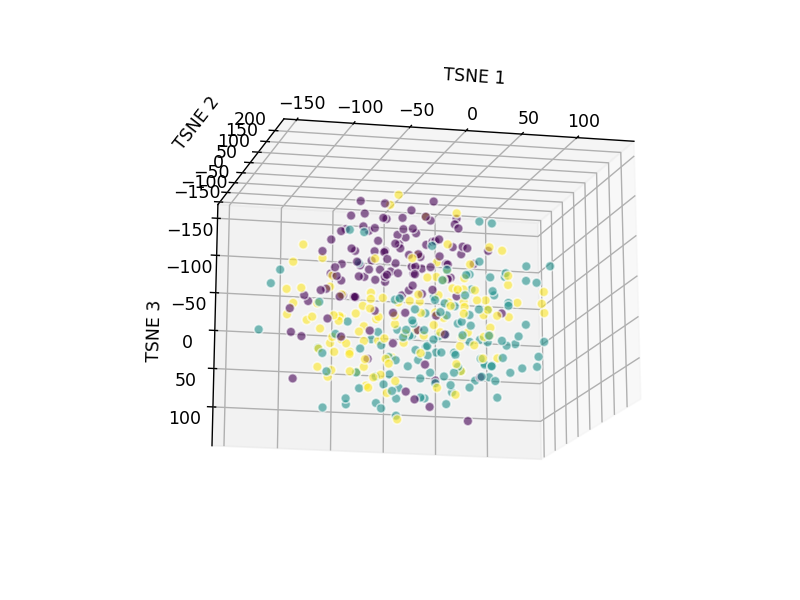

In [122]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_df['tsne1'], tsne_df['tsne2'], tsne_df['tsne3'], c=tsne_df['label'], s=30, alpha=0.6, edgecolors='w')

ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')

plt.show()

In [123]:
tsne = TSNE(n_components=2).fit_transform(x)

In [124]:
tsne_df1 = train[['type']]
tsne_df1['tsne1'] = tsne[:,[0]]
tsne_df1['tsne2'] = tsne[:,[1]]
# tsne_df['type'] = train['type']
tsne_df1.shape

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(371, 3)

In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tsne_df1['label'] = le.fit_transform(tsne_df1['type'])

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [126]:
tsne_df1.head()

type      tsne1      tsne2  label
0   Ghoul   7.150377  -0.833222      1
1  Goblin  -0.384353  -3.348083      2
2   Ghoul  11.060739 -12.713035      1
3   Ghoul  13.193446 -16.451229      1
4   Ghost   8.859319   7.802746      0

<IPython.core.display.Javascript object>


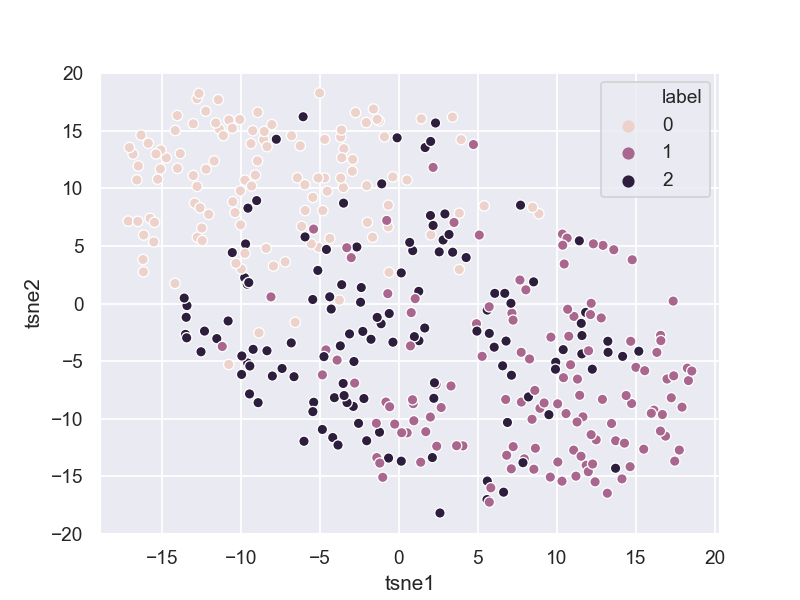

In [129]:
sns.set()
sns.scatterplot('tsne1', 'tsne2', hue='label', data=tsne_df1)

plt.show()

<IPython.core.display.Javascript object>


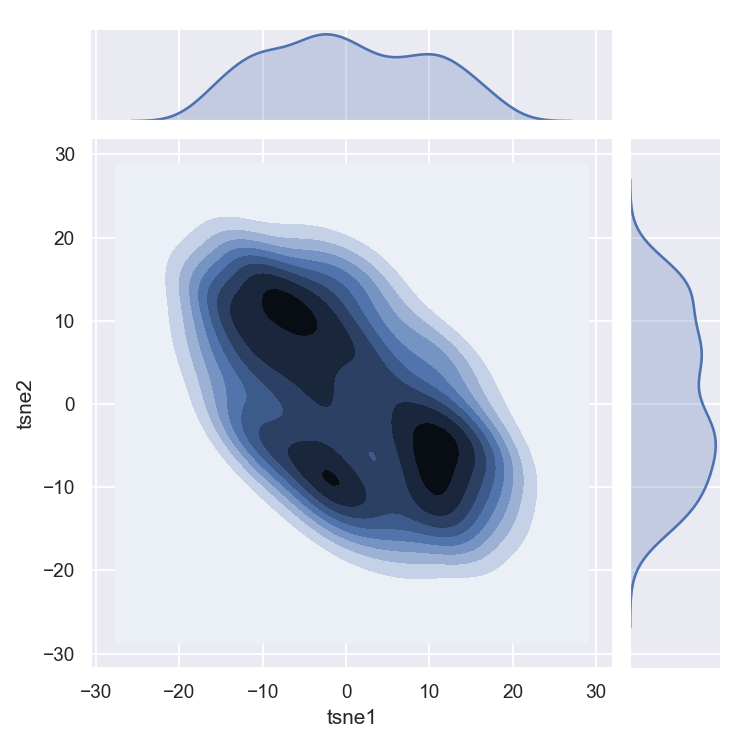

In [130]:
sns.set()
sns.jointplot('tsne1', 'tsne2', kind='kde', data=tsne_df1)

plt.show()

In [148]:
x = np.asarray(train_transformed.iloc[:, 6:])

In [93]:
from sklearn.manifold import TSNE

In [149]:
tsne = TSNE(n_components=3).fit_transform(x)

In [150]:
tsne_df = train_transformed[['type']]
tsne_df['tsne1'] = tsne[:,[0]]
tsne_df['tsne2'] = tsne[:,[1]]
tsne_df['tsne3'] = tsne[:,[2]]
# tsne_df['type'] = train['type']
tsne_df.shape

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

(371, 4)

In [151]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tsne_df['label'] = le.fit_transform(tsne_df['type'])

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [152]:
tsne_df.head()

type      tsne1      tsne2       tsne3  label
0   Ghoul -56.046307 -19.325193   13.152922      1
1  Goblin -17.629925  41.862476  -14.970639      2
2   Ghoul -91.558968  55.370384  -96.545242      1
3   Ghoul -72.677513  -8.467126  -78.621315      1
4   Ghost -16.061333   1.803301  156.149734      0

<IPython.core.display.Javascript object>


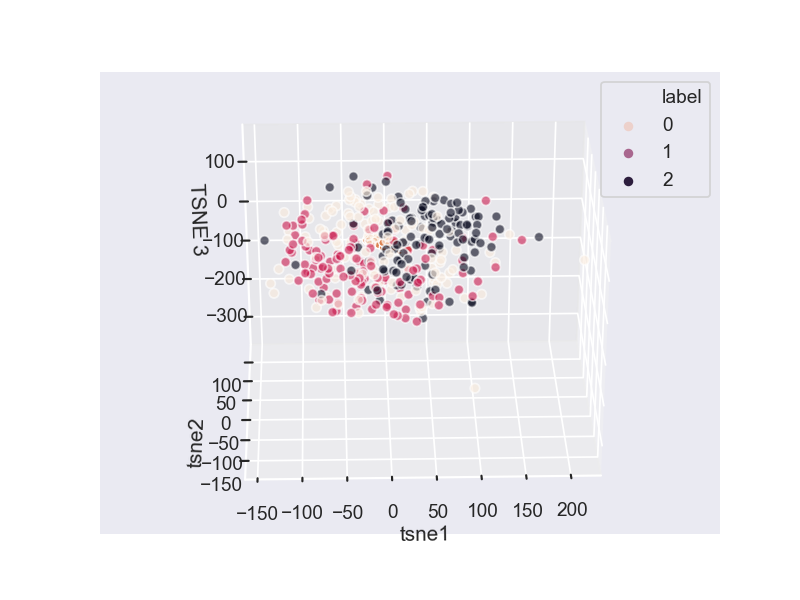

In [153]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_df['tsne1'], tsne_df['tsne2'], tsne_df['tsne3'], c=tsne_df['label'], s=30, alpha=0.6, edgecolors='w')

ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')

plt.show()

In [154]:
tsne = TSNE(n_components=2).fit_transform(x)

In [155]:
tsne_df1 = train[['type']]
tsne_df1['tsne1'] = tsne[:,[0]]
tsne_df1['tsne2'] = tsne[:,[1]]
# tsne_df['type'] = train['type']
tsne_df1.shape

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(371, 3)

In [156]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tsne_df1['label'] = le.fit_transform(tsne_df1['type'])

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [157]:
tsne_df1.head()

type      tsne1      tsne2  label
0   Ghoul   3.065274  -3.493250      1
1  Goblin   1.503604   1.606904      2
2   Ghoul  20.282919 -13.953634      1
3   Ghoul  21.354368 -18.441902      1
4   Ghost  18.730879  -4.652716      0

<IPython.core.display.Javascript object>


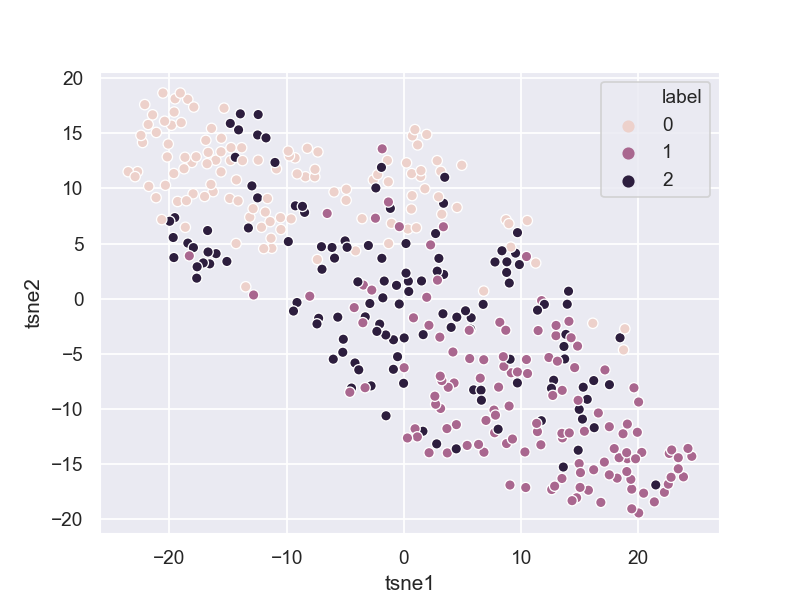

In [159]:
sns.set()
sns.scatterplot('tsne1', 'tsne2', hue='label', data=tsne_df1)

plt.show()

<IPython.core.display.Javascript object>


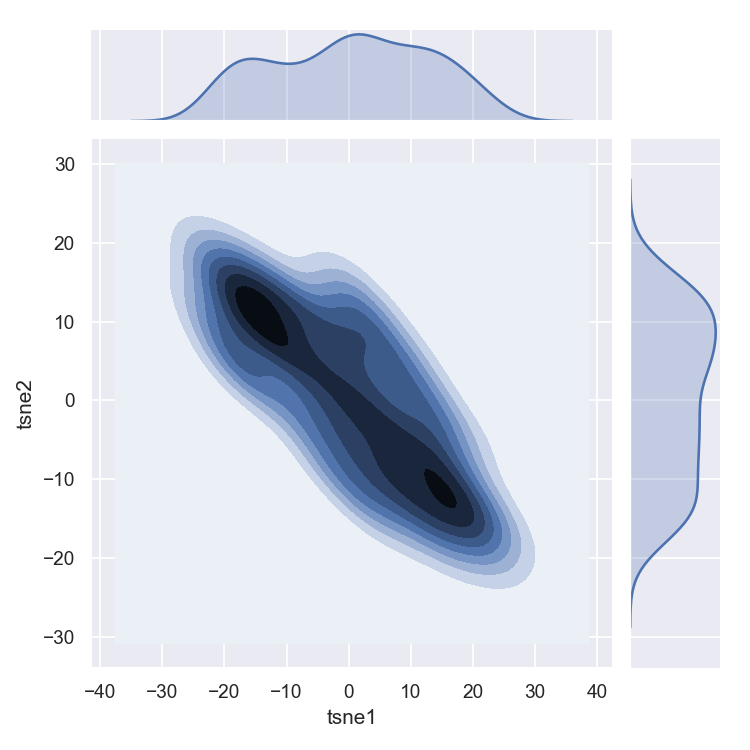

In [160]:
sns.set()
sns.jointplot('tsne1', 'tsne2', kind='kde', data=tsne_df1)

plt.show()

In [162]:
train_transformed.head()

bone_length  rotting_flesh  hair_length  has_soul  color    type  \
0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul   
1     0.575560       0.425868     0.531401  0.439899  green  Goblin   
2     0.467875       0.354330     0.811616  0.791225  black   Ghoul   
3     0.776652       0.508723     0.636766  0.884464  black   Ghoul   
4     0.566117       0.875862     0.418594  0.636438  green   Ghost   

   rotting_bone  rotting_hair  rotting_soul  bone_hair  bone_soul  soul_hair  
0      0.124377      0.163407      0.274055   0.165118   0.276924   0.363825  
1      0.245113      0.226307      0.187339   0.305853   0.253188   0.233763  
2      0.165783      0.287580      0.280355   0.379735   0.370195   0.642171  
3      0.395101      0.323937      0.449947   0.494546   0.686921   0.563196  
4      0.495840      0.366630      0.557432   0.236973   0.360298   0.266409

In [167]:
cols = [0,1,2,3,6,7,8,9,10,11]
x = np.asarray(train_transformed.iloc[:, cols])

In [168]:
x.shape

(371, 10)

In [93]:
from sklearn.manifold import TSNE

In [169]:
tsne = TSNE(n_components=3).fit_transform(x)

In [170]:
tsne_df = train_transformed[['type']]
tsne_df['tsne1'] = tsne[:,[0]]
tsne_df['tsne2'] = tsne[:,[1]]
tsne_df['tsne3'] = tsne[:,[2]]
# tsne_df['type'] = train['type']
tsne_df.shape

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

(371, 4)

In [171]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tsne_df['label'] = le.fit_transform(tsne_df['type'])

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [172]:
tsne_df.head()

type       tsne1      tsne2      tsne3  label
0   Ghoul  -27.330154 -55.097492 -22.839212      1
1  Goblin   23.291285  39.258015  21.727608      2
2   Ghoul   73.736664 -46.576973  89.929169      1
3   Ghoul   93.916603 -95.122978  63.172150      1
4   Ghost -100.780632 -13.714906  23.719879      0

<IPython.core.display.Javascript object>


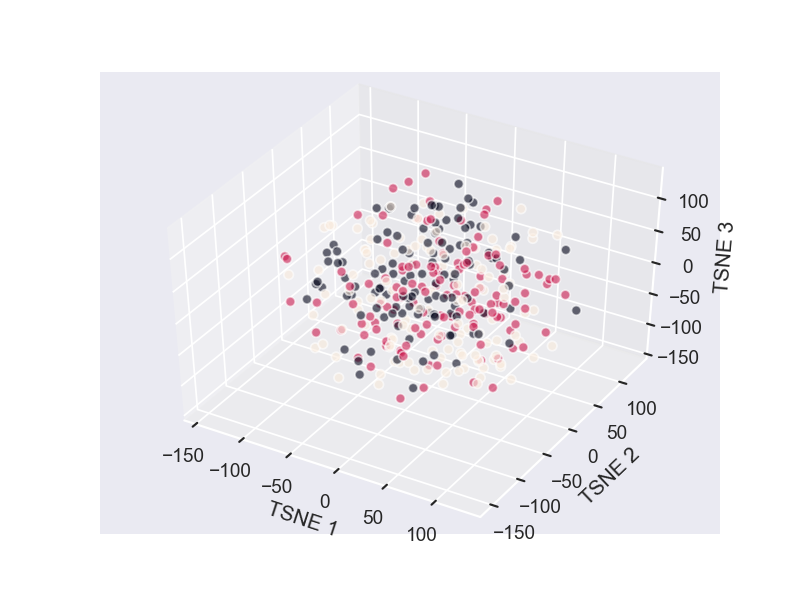

In [173]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_df['tsne1'], tsne_df['tsne2'], tsne_df['tsne3'], c=tsne_df['label'], s=30, alpha=0.6, edgecolors='w')

ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')

plt.show()

In [174]:
tsne = TSNE(n_components=2).fit_transform(x)

In [175]:
tsne_df1 = train[['type']]
tsne_df1['tsne1'] = tsne[:,[0]]
tsne_df1['tsne2'] = tsne[:,[1]]
# tsne_df['type'] = train['type']
tsne_df1.shape

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(371, 3)

In [176]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tsne_df1['label'] = le.fit_transform(tsne_df1['type'])

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [177]:
tsne_df1.head()

type      tsne1      tsne2  label
0   Ghoul -12.376500  -1.172393      1
1  Goblin   5.028942  -4.818665      2
2   Ghoul -17.382608 -12.009112      1
3   Ghoul -20.580164 -14.604885      1
4   Ghost -20.525576  -1.457939      0

<IPython.core.display.Javascript object>


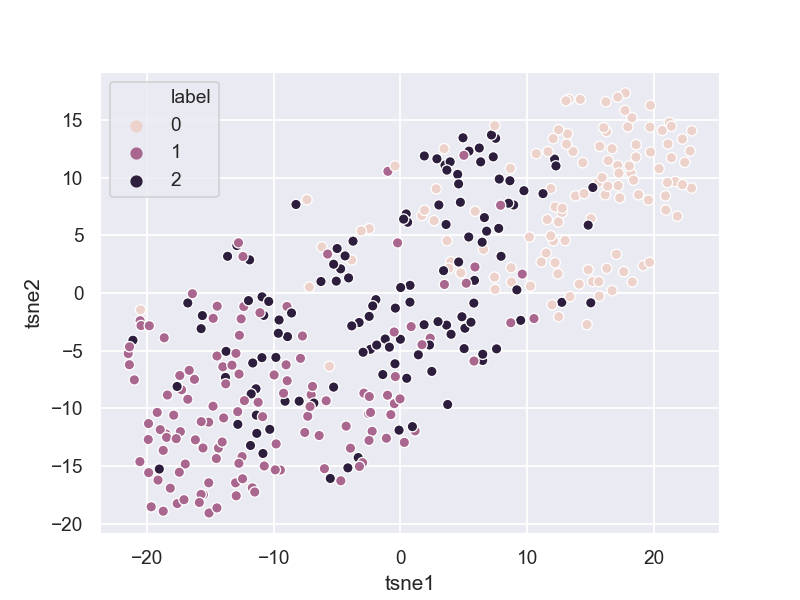

In [178]:
sns.set()
sns.scatterplot('tsne1', 'tsne2', hue='label', data=tsne_df1)

plt.show()

<IPython.core.display.Javascript object>


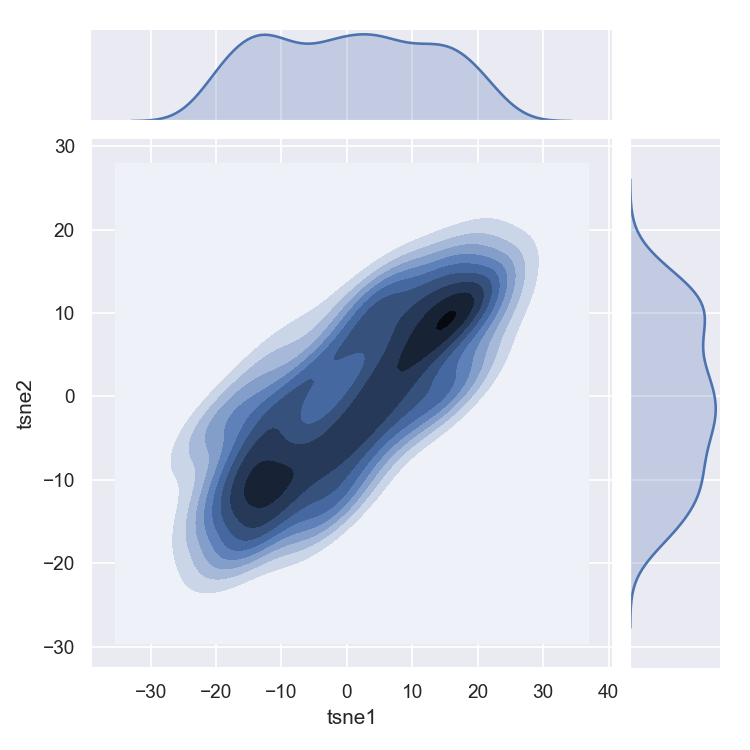

In [179]:
sns.set()
sns.jointplot('tsne1', 'tsne2', kind='kde', data=tsne_df1)

plt.show()